# Using PyTorch Tensors 

A PyTorch Tensor is basically the same as a numpy multidimensional array: it does not know
anything about deep learning or computational graphs or gradients, and is just
a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that
a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU,
just cast the Tensor to a cuda datatype.

(This example is adapted from: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html )


### Installation: https://pytorch.org/get-started/locally/


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Basic tensor matrix operations

In [2]:
# Simple matrix
m1 = torch.ones(3,4)
print('Matrix m1: \n', m1)
print(m1.shape,"\n")

# Another (random) matrix
m2 = torch.rand(3,4) # fill 3x4 matrix with uniform random numbers in [0,1] interval
print('Matrix m2: \n', m2)
print(m2.shape,"\n")

# Transpose of a matrix
print('Matrix m2^T: \n', m2.t())
print(m2.t().shape,"\n")

# Matrix operations
m3 = m1*m2      # Not a matrix multiplication ! Here each value in matrix m1 are multiplied by value m2
print('Matrix m3: \n', m3)
print(m3.shape,"\n")

# Matrix multiplication using torch.mm
m4 = m1.mm(m2.t())
print('Matrix m4: \n', m4)
print(m4.shape,"\n")

# Matrix multiplication using torch.matmul
m5 = m1.matmul(m2.t())
print('Matrix m5: \n', m5)
print(m5.shape,"\n")

# For matrix-vector multiplication there is also the possibility to use torch.mv
vec = torch.tensor([1.0,2.0,3.0])
print(torch.matmul(m5, vec))

Matrix m1: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.Size([3, 4]) 

Matrix m2: 
 tensor([[0.4573, 0.7953, 0.6288, 0.3974],
        [0.6732, 0.5191, 0.1887, 0.0919],
        [0.9136, 0.4894, 0.1133, 0.5181]])
torch.Size([3, 4]) 

Matrix m2^T: 
 tensor([[0.4573, 0.6732, 0.9136],
        [0.7953, 0.5191, 0.4894],
        [0.6288, 0.1887, 0.1133],
        [0.3974, 0.0919, 0.5181]])
torch.Size([4, 3]) 

Matrix m3: 
 tensor([[0.4573, 0.7953, 0.6288, 0.3974],
        [0.6732, 0.5191, 0.1887, 0.0919],
        [0.9136, 0.4894, 0.1133, 0.5181]])
torch.Size([3, 4]) 

Matrix m4: 
 tensor([[2.2788, 1.4730, 2.0345],
        [2.2788, 1.4730, 2.0345],
        [2.2788, 1.4730, 2.0345]])
torch.Size([3, 3]) 

Matrix m5: 
 tensor([[2.2788, 1.4730, 2.0345],
        [2.2788, 1.4730, 2.0345],
        [2.2788, 1.4730, 2.0345]])
torch.Size([3, 3]) 

tensor([11.3284, 11.3284, 11.3284])


## More operations (power, sum, clamp, ...)

(See even more basic operations here: https://jhui.github.io/2018/02/09/PyTorch-Basic-operations/)

In [3]:
mat = torch.rand(3, 4)
print(mat)

# Takes the power of each element in input
print(mat.pow(3))

# Returns the sum of all elements in the input tensor
print(mat.sum())

# Clamp all elements in input into the range [ min, max ] and return a resulting tensor
print(mat.clamp(0.3,0.7))

tensor([[0.5441, 0.7002, 0.2132, 0.5172],
        [0.1900, 0.5732, 0.5493, 0.9091],
        [0.7673, 0.6547, 0.0488, 0.2573]])
tensor([[1.6106e-01, 3.4325e-01, 9.6858e-03, 1.3834e-01],
        [6.8601e-03, 1.8835e-01, 1.6576e-01, 7.5124e-01],
        [4.5170e-01, 2.8062e-01, 1.1588e-04, 1.7034e-02]])
tensor(5.9242)
tensor([[0.5441, 0.7000, 0.3000, 0.5172],
        [0.3000, 0.5732, 0.5493, 0.7000],
        [0.7000, 0.6547, 0.3000, 0.3000]])


## Convertion to numpy array

In [4]:
# convertion PyTorch -> numpy
a = torch.randn(5)
b = a.numpy()

# convertion numpy -> PyTorch
c = torch.from_numpy(b)

print(a)
print(b)
print(c)

tensor([-0.4394,  0.0352,  0.9890,  2.0056, -1.1173])
[-0.43941975  0.03518856  0.988989    2.0055666  -1.117322  ]
tensor([-0.4394,  0.0352,  0.9890,  2.0056, -1.1173])


## Example using automatic differentiation (Autograd)

A PyTorch Tensor represents a node in a computational graph. 

If ``x`` is a
Tensor that has ``x.requires_grad=True`` then ``x.grad`` is another Tensor
holding the gradient of ``x`` with respect to some scalar value.

Example for simple regression:

	 x=1.0 y=1.0, w=1.00, dloss/dw=-28.0
	 x=2.0 y=2.6, w=1.28, dloss/dw=-89.8
	 x=3.0 y=6.5, w=2.18, dloss/dw=-170.8
	 x=4.0 y=15.5, w=3.89, dloss/dw=-235.7
	 x=5.0 y=31.2, w=6.24, dloss/dw=-237.9
	 x=6.0 y=51.7, w=8.62, dloss/dw=-159.3
	 x=7.0 y=71.5, w=10.21, dloss/dw=-49.0
	 x=8.0 y=85.6, w=10.70, dloss/dw=10.1
	 x=9.0 y=95.4, w=10.60, dloss/dw=7.7
	 x=10.0 y=105.3, w=10.53, dloss/dw=5.3

The values at epoch 1 are: loss = 0.069, y_pred = 105.263, w = 10.474, 
	 x=1.0 y=10.5, w=10.47, dloss/dw=-9.1
	 x=2.0 y=21.1, w=10.56, dloss/dw=-15.5
	 x=3.0 y=32.2, w=10.72, dloss/dw=-17.1
	 x=4.0 y=43.6, w=10.89, dloss/dw=-11.5
	 x=5.0 y=55.0, w=11.00, dloss/dw=0.2
	 x=6.0 y=66.0, w=11.00, dloss/dw=12.2
	 x=7.0 y=76.2, w=10.88, dloss/dw=16.3
	 x=8.0 y=85.7, w=10.72, dloss/dw=11.9
	 x=9.0 y=95.4, w=10.60, dloss/dw=7.0
	 x=10.0 y=105.3, w=10.53, dloss/dw=5.7

The values at epoch 2 are: loss = 0.082, y_pred = 105.286, w = 10.471, 
	 x=1.0 y=10.5, w=10.47, dloss/dw=-9.1
	 x=2.0 y=21.1, w=10.56, dloss/

/tmp/ipykernel_3290/2415138374.py:23: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print('\t x=%.1f y=%.1f, w=%.2f, dloss/dw=%.1f' % (x_train, y_pred, w.data, w.grad.data))


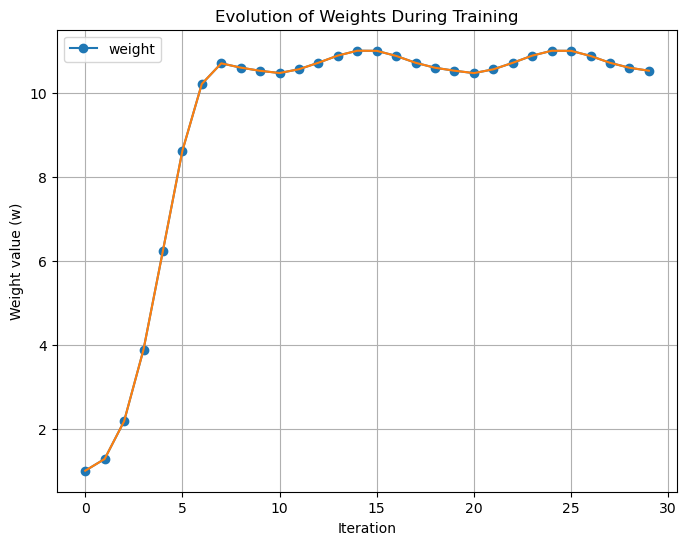

In [5]:
# Now we have the following data. How should be modified the above code 

x = [1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]           # data
y = [15., 25., 35., 45., 55., 65., 75., 85., 95., 105.] # target values
w = torch.tensor([1.],requires_grad=True)  # initial weight
w_history = []


# cycle over a number of epochs

n_epochs = 3
for epoch in range(n_epochs):
    
    # gradient descent to minimize loss function
    
    for x_train, y_train in zip(x,y):  # loop over data and target
        y_pred = x_train * w
        
        #Loss funtion
        
        loss = (y_pred - y_train)**2
        loss.backward()    
        print('\t x=%.1f y=%.1f, w=%.2f, dloss/dw=%.1f' % (x_train, y_pred, w.data, w.grad.data))
        w_history.append(w.data.clone().item())
        
        # make one step towards the local minima, with learning rate 0.01
        
        w.data -= 0.01 * w.grad.data
        
        # clear gradients after updating weights
        
        w.grad.data.zero_()
        
    print(f"\nThe values at epoch {epoch+1} are: loss = {loss[0]:.3f}, y_pred = {y_pred[0]:.3f}, w = {w[0]:.3f}, ")

print(f"\nFinal w = {w[0]:.2f}")


# Plot of evolution of weights

plt.figure(figsize=(8,6))
plt.title("Evolution of Weights During Training")
plt.plot(range(len(w_history)), w_history, marker='o', label = "weight")
plt.plot(range(len(w_history)), w_history)
plt.xlabel("Iteration")
plt.ylabel("Weight value (w)")
plt.grid()
plt.legend()
plt.savefig("weight_evolution_train.png", dpi = 300)


## Exercice: Simple Neural Network implementation

We consider a fully-connected ReLU network with one hidden layer of 100 neurons and no biases, trained to predict y from x by minimizing squared Euclidean distance.

The model that we want to build has the following structure:
$$\hat{y}(x) = \text{relu}(x.w_1).w_2,$$
where $x$ and $y$ are the input and output features (of dimension 1000 and 10, respectively). N=64 examples are considered for the training. Here the relu activation function is used and $w_1$ and $w_2$ are weight matrices.

This implementation computes the forward pass using operations on PyTorch Tensors, and uses PyTorch autograd to compute gradients.

### Initialization

In [6]:
# Set configuration

dtype = torch.float
#device = torch.device("cpu")  #  run on CPU
device = torch.device("cuda:0") #  run on GPU


# Set network dimension

N = 64      # N: input batch size
D_in = 1000 # D_in: input dimension
H = 100     # H: hidden layer dimension;
D_out = 10  # D_out: output dimension

# Set learning rate and epochs

learning_rate = 1e-6
n_epochs = 500


# Create random Tensors to hold input and outputs
# Default setting requires_grad=False indicates that we do not need to compute gradients with respect to these Tensors during the backward pass.

x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)


# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with respect to these Tensors during the backward pass.

w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

### Train network using pytorch

We implement the following steps:
- The model: $$\hat{y}(x) = \text{relu}(x.w_1).w_2,$$
- The loss function: $$\sum_{i=1}^{i=64}(\hat{y}(x_i) - y_i)^2$$
- The gradient and the weight update
- Train for N_epochs
- Validation: at each epoch test the model on an independently created sample (see below)
- Store the loss values of the train and validation sample for each epoch
- Do the training and validation steps for N_epochs
- Plot the evolution of cost as a function of the number of iterations.

In [7]:
# Independent validation sample, on which the model is tested at each epoch

x_val = torch.randn(N, D_in, device=device, dtype=dtype)
y_val = torch.randn(N, D_out, device=device, dtype=dtype)
cost_function = []  # evolution of cost function for training
cost_function_val = []  # evolution of cost function for test

for epoch in range(n_epochs):

    # do training
    
    relu_result = (x.mm(w1)).clamp(min = 0)  # fisrt calculate reLU 
    y_pred = relu_result.mm(w2)  # prediction 
    loss = ((y_pred - y) ** 2).sum()   # loss function
    cost_function.append(loss.item())
    loss.backward()
    

    # Use autograd to compute the backward pass.
    #call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    
    with torch.no_grad():
        
        # Calculate the loss on the validation sample (not used for the calculation of the weights)
        
        y_pred_val = (x_val.mm(w1)).clamp(min = 0).mm(w2)
        loss_val = ((y_pred_val - y_val) ** 2).sum()
        cost_function_val.append(loss_val.item())
    
        w1  -=  learning_rate * w1.grad
        w2  -=  learning_rate * w2.grad
        
        # Manually zero the gradients after updating weights
        
        w1.grad.zero_()
        w2.grad.zero_()

    

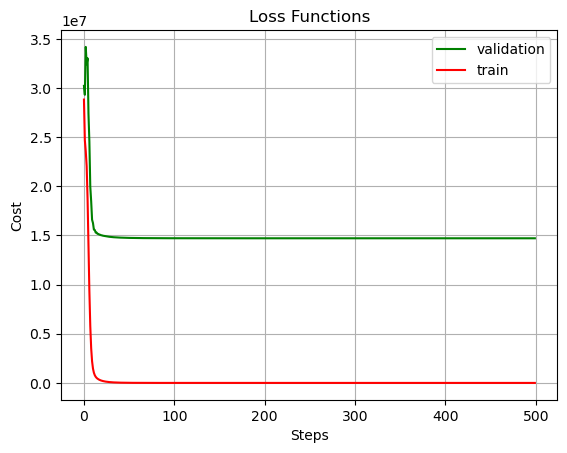

In [9]:
# Plot the model performance

#plt.figure(figsize=(10,6))
plt.title("Loss Functions")
plt.plot(range(n_epochs), cost_function_val, label = "validation", color = "green") 
plt.plot(range(n_epochs), cost_function, label = "train", color = "red") 
plt.ylabel("Cost")
plt.xlabel("Steps")
plt.legend()
plt.grid()
plt.savefig("performance_train_and_validation.png", dpi = 300)